I. Clean the files and combine them into one final DataFrame.

This dataframe should have the following columns:
- Hero (Just the name of the Hero) x
- Publisher x
- Gender x
- Eye color (needs cleaning)
- Race x
- Hair color x
- Height (numeric) x
- Skin color x
- Alignment x
- Weight (numeric) x 
- Plus, one-hot-encoded columns for every power that appears in the dataset. E.g.:
 - Agility
 - Flight
 - Superspeed
 - etc.
 
Hint: There is a space in "100 kg" or "52.5 cm"

## Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os,json
import warnings

warnings.filterwarnings("ignore")

In [2]:
hero_file = "Data/superhero_info - superhero_info.csv"
powers_file = "Data/superhero_powers - superhero_powers.csv"

df_hero = pd.read_csv(hero_file)
df_powers = pd.read_csv(powers_file)

## Heroes Cleaning

In [3]:
# check df hero
df_hero

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"
...,...,...,...,...,...,...,...,...
458,Yellowjacket|Marvel Comics,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}"
459,Yellowjacket II|Marvel Comics,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}"
460,Yoda|George Lucas,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}"
461,Zatanna|DC Comics,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}"


In [4]:
# check dtypes
df_hero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [5]:
# df hero stats
df_hero.describe()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
count,463,463,463,463,463,463,463,463
unique,457,3,52,4,29,21,14,287
top,Spider-Man|Marvel Comics,Male,Human,good,Black,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '90.0 kg'}"
freq,3,321,156,311,127,182,409,6


In [6]:
# split 'Hero|Publisher' and drop original column
df_hero[["Hero", "Publisher"]] = df_hero["Hero|Publisher"].str.split("|", expand = True)
df_hero = df_hero.drop(columns = ["Hero|Publisher"])

In [7]:
# check split and drop changes
df_hero.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [8]:
df_hero[["Height (cm)", "Weight (kg)"]] = df_hero["Measurements"].str.split(",", expand = True)
df_hero = df_hero.drop(columns = ["Measurements"])
df_hero.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,{'Height': '203.0 cm','Weight': '441.0 kg'}
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,{'Height': '191.0 cm','Weight': '65.0 kg'}
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,{'Height': '185.0 cm','Weight': '90.0 kg'}
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,{'Height': '203.0 cm','Weight': '441.0 kg'}
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,{'Height': '193.0 cm','Weight': '122.0 kg'}


In [9]:
# remove character text
to_replace = ["{", "}", ":", "'", "Height", "cm"]
for char in to_replace:
    df_hero["Height (cm)"] = df_hero["Height (cm)"].str.replace(char,'', regex = False)

# dtype to float
df_hero["Height (cm)"] = df_hero["Height (cm)"].astype(float)  
df_hero.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,'Weight': '441.0 kg'}
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,'Weight': '65.0 kg'}
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,'Weight': '90.0 kg'}
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,'Weight': '441.0 kg'}
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,'Weight': '122.0 kg'}


In [10]:
# remove character text
to_replace = ["{", "}", ":", "'", "Weight", "kg"]
for char in to_replace:
    df_hero["Weight (kg)"] = df_hero["Weight (kg)"].str.replace(char,'', regex = False)

# dtype to float    
df_hero["Weight (kg)"] = df_hero["Weight (kg)"].astype(float)
df_hero.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg)
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


In [11]:
df_hero.explode

<bound method DataFrame.explode of      Gender               Race Alignment        Hair color Eye color  \
0      Male              Human      good           No Hair    yellow   
1      Male      Icthyo Sapien      good           No Hair      blue   
2      Male            Ungaran      good           No Hair      blue   
3      Male  Human / Radiation       bad           No Hair     green   
4      Male              Human       bad           No Hair      blue   
..      ...                ...       ...               ...       ...   
458    Male              Human      good             Blond      blue   
459  Female              Human      good  Strawberry Blond      blue   
460    Male     Yoda's species      good             White     brown   
461  Female              Human      good             Black      blue   
462    Male            Unknown       bad             Brown       red   

    Skin color             Hero          Publisher  Height (cm)  Weight (kg)  
0      Unknown       

In [12]:
data_types = df_hero.dtypes
data_types

Gender          object
Race            object
Alignment       object
Hair color      object
Eye color       object
Skin color      object
Hero            object
Publisher       object
Height (cm)    float64
Weight (kg)    float64
dtype: object

In [13]:
str_cols = data_types[data_types=='object'].index
str_cols

Index(['Gender', 'Race', 'Alignment', 'Hair color', 'Eye color', 'Skin color',
       'Hero', 'Publisher'],
      dtype='object')

In [14]:
for col in str_cols:
  print(f'- {col}:')
  print(df_hero[col].value_counts(dropna=False))
  print('\n\n')

- Gender:
Male       321
Female     134
Unknown      8
Name: Gender, dtype: int64



- Race:
Human                156
Unknown              145
Mutant                51
Human / Radiation     11
Android                7
Symbiote               7
Alien                  6
Demon                  6
Cyborg                 6
Kryptonian             5
Atlantean              5
Asgardian              5
Inhuman                4
New God                3
Human-Kree             2
Eternal                2
Demi-God               2
Saiyan                 2
Amazon                 2
Human / Altered        2
Metahuman              2
God / Eternal          2
Human-Vulcan           1
Martian                1
Zombie                 1
Korugaran              1
Talokite               1
Clone                  1
Human-Spartoi          1
Animal                 1
Yautja                 1
Human / Cosmic         1
Tamaranean             1
Mutant / Clone         1
Luphomoid              1
Frost Giant            1
Stronti

In [15]:
df_hero["Hair color"].replace({"blond" : "Blond", "black" : "Black", "Brownn" : "Brown"}, inplace = True)
df_hero["Hair color"].value_counts()

Black               130
Blond                77
Brown                70
No Hair              52
Red                  41
White                22
Unknown              18
Auburn               13
Green                 6
Strawberry Blond      5
Purple                4
Brown / White         4
Grey                  4
Silver                3
Blue                  2
Orange                2
Pink                  1
Gold                  1
Red / White           1
Indigo                1
Red / Orange          1
Red / Grey            1
Yellow                1
Orange / White        1
Magenta               1
Black / Blue          1
Name: Hair color, dtype: int64

##  Superpowers Cleaning


In [16]:
df_powers.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [17]:
df_powers["Powers"] = df_powers["Powers"].str.split(",")
df_powers.head()

,hero_names,Powers
0,3-D Man,"[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,[Lantern Power Ring]
4,Abomination,"[Accelerated Healing, Intelligence, Super Stre..."


In [18]:
superpowers = df_powers.loc[1, "Powers"]
superpowers

['Accelerated Healing',
 'Durability',
 'Longevity',
 'Super Strength',
 'Stamina',
 'Camouflage',
 'Self-Sustenance']

In [19]:
exploded = df_powers.explode("Powers")
exploded[["hero_names", "Powers"]].head()

,hero_names,Powers
0,3-D Man,Agility
0,3-D Man,Super Strength
0,3-D Man,Stamina
0,3-D Man,Super Speed
1,A-Bomb,Accelerated Healing


In [20]:
cols_to_make = exploded["Powers"].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [21]:
df_powers["Powers"] = df_powers["Powers"].astype(str)

In [25]:
for col in cols_to_make:
    df_powers[col] = df_powers["Powers"].str.contains(col)
df_powers.head()

,hero_names,Powers,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"['Agility', 'Super Strength', 'Stamina', 'Supe...",True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"['Accelerated Healing', 'Durability', 'Longevi...",False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"['Agility', 'Accelerated Healing', 'Cold Resis...",True,True,True,False,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,['Lantern Power Ring'],False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"['Accelerated Healing', 'Intelligence', 'Super...",False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:

df_powers = df_powers.drop(columns = ["Powers"])

In [27]:
df_powers.head()

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,True,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
merged = pd.merge(df_hero, df_powers, left_on = "Hero", right_on = "hero_names")

merged.head(3)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height (cm),Weight (kg),...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False


## Exploratory Data Analysis

In [78]:
avg_weight = merged.groupby('Super Speed')['Weight (kg)'].agg(mean_weight = ("mean"))

#set new aggregate mean onto rev_avg
avg_weight = avg_weight.reset_index()
avg_weight = avg_weight.round(0)
avg_weight.head()

,Super Speed,mean_weight
0,False,102.0
1,True,129.0


[Text(0, 0, '102'), Text(0, 0, '129')]

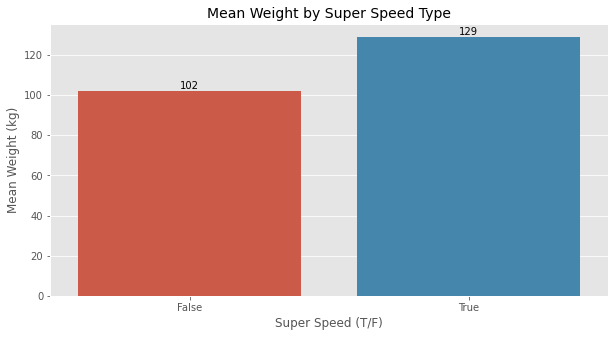

In [79]:
# set the style
plt.style.use('ggplot')

# set the size
fig, ax = plt.subplots(figsize=(10,5))


# plot bars
weight_chart = sns.barplot(x='Super Speed', 
            y='mean_weight', 
            data = avg_weight) 

# labels and title
plt.ylabel("Mean Weight (kg)", size=12)
plt.xlabel("Super Speed (T/F)", size=12)
plt.title("Mean Weight by Super Speed Type", size=14)

weight_chart.bar_label(weight_chart.containers[0])

> True means that the hero has super speed, this shows that heroes with super speed tend to weigh heavier than those who do not have super speed.

In [72]:
avg_height = merged.groupby('Publisher')['Height (cm)'].agg(mean_height = ("mean"))

#set new aggregate mean onto rev_avg
avg_height = avg_height.reset_index()
avg_height = avg_height.round(1)
avg_height.head()

,Publisher,mean_height
0,DC Comics,181.9
1,Dark Horse Comics,176.9
2,George Lucas,159.6
3,Image Comics,211.0
4,Marvel Comics,191.5


[Text(0, 0, '181.9'),
 Text(0, 0, '176.9'),
 Text(0, 0, '159.6'),
 Text(0, 0, '211'),
 Text(0, 0, '191.5'),
 Text(0, 0, '171.5'),
 Text(0, 0, '181.5'),
 Text(0, 0, '180.8'),
 Text(0, 0, '178')]

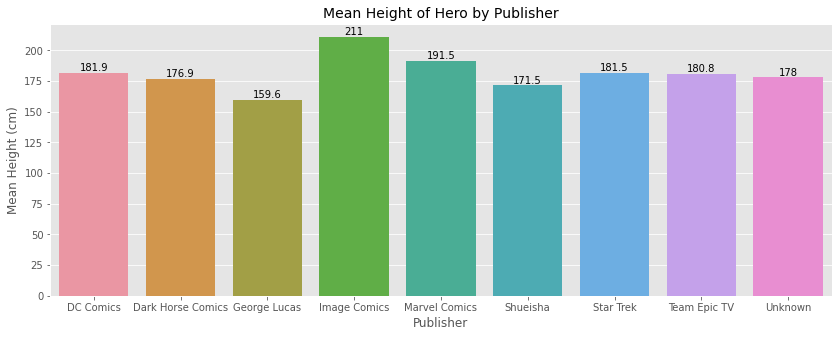

In [73]:
# set the style
plt.style.use('ggplot')

# set the size
fig, ax = plt.subplots(figsize=(14,5))


# plot bars
height_chart = sns.barplot(x='Publisher', 
            y='mean_height', 
            data = avg_height) 

# labels and title
plt.ylabel("Mean Height (cm)", size=12)
plt.xlabel("Publisher", size=12)
plt.title("Mean Height of Hero by Publisher", size=14)

height_chart.bar_label(height_chart.containers[0])

>Image Comcics heroes are on average taller, and George Lucas heroes are on average shorter than the rest of the heroes from other publishers.